# EJERCICIOS

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

In [2]:
# 1- Al ser una clasificación binaria solo necesitamos una neurona con un umbral
# 2- Una función sigmoide dado a que nos ayuda a trabajar con probabilidades
# 3- Una por cada clase, teniendo 10 dígitos usaríamos 10 neuronas. Se usaría softmax como función
# de activación dado a que distribuiría las probabilidades de forma equitativa entre las 10 neuronas 
# de salida
# 4- Una neurona en la capa de salida y sin función de activación dado a que es una regresión


## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [3]:
# Cargar los datos MNIST
(data_train, data_test) = tf.keras.datasets.mnist.load_data()

# Dividir los datos en imágenes y etiquetas
(x_train, y_train) = data_train  # Datos de entrenamiento
(x_test, y_test) = data_test     # Datos de prueba

# Dividir x_train y y_train para crear un conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
# Aplanar las imágenes (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Normalizar la escala de grises
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

# Construir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Definimos las tasas de aprendizaje
learning_rates = [1e-3,1e-2,0.1]

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_3_2.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Variables finales inicializadas
best_acc = 0
best_lr = 0
best_model = 0

# Por cada valor de learning_rates...
for learning_rate in learning_rates:
    print(f"Entrenando con learning rate: {learning_rate}")
    # Se define el optimizador Adam con la tasa de aprendizaje
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compilar el modelo
    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb],
    )
    name = "/home/iabd/Documentos/Python_clase/SAPA/Ejercicios/modelos/4_3_2/"
    name += str(learning_rate)
    name += ".keras"
    print(name)
    model.save(name)

    test_loss, test_acc = model.evaluate(x_val, y_val)

    # Comparar valores
    if test_acc > best_acc:
        best_acc = test_acc
        best_lr = learning_rate
        best_model = model
print(f"El mejor learning rate es de {best_lr}, con una exactitud de {best_acc}")


Entrenando con learning rate: 0.001
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8610 - loss: 0.4793 - val_accuracy: 0.9563 - val_loss: 0.1490
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1173 - val_accuracy: 0.9665 - val_loss: 0.1094
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0798 - val_accuracy: 0.9678 - val_loss: 0.1036
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9756 - val_loss: 0.0879
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9739 - val_loss: 0.0892
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0356 - val_accuracy: 0.9722 - val_loss: 0.1027
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0276 - val_accuracy: 0.9765 - val_loss: 0.0930
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2

## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [6]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [17]:
import warnings
import matplotlib.pyplot as plt

def display_image(data,tag=""):
    """
    Muestra una única imagen utilizando plt.imshow.

    Parámetros:
    - data: Imagen en formato numpy array (32x32x3, por ejemplo).
    Opcionales:
    - tag: Etiqueta de la imagen con un str del número a adivinar.
    """
    plt.imshow(data)
    plt.axis('off')  # Ocultar los ejes
    if tag !="":
        plt.title(tag)
    plt.show()

def display_many(data, tags, x, y):
    """
    Muestra varias imágenes en una cuadrícula de tamaño x por y.

    Parámetros:
    - data: Array con imágenes (Number, Height, Width, Color)
    - tag: Array con etiquetas de las imágenes en formato str, que se correlacionen con data
    - x: Número de filas en la cuadrícula.
    - y: Número de columnas en la cuadrícula.

    Lanza:
    - IndexError: Si hay menos imágenes en el array que el número requerido (x * y).
    - ValueError: Si no coindiden la longitud de los datos con las etiquetas
    """
    if len(data) > x * y:
        warnings.warn(
            f"La cantidad de imágenes ({len(data)}) es superior a las dimensiones de la cuadrícula "
            f"({x}x{y} = {x*y}). No se mostrarán todas las imágenes.",
            UserWarning
        )
    if len(data) != len(tags):
        raise ValueError(
            f"La longitud de las imágenes ({len(data)}) no coincide con la longitud de las etiquetas ({len(tags)})"
        )
    
    if len(data) < x * y:
        raise IndexError(
            f"Las dimensiones proporcionadas de {x} x {y} requieren {x*y} imágenes, "
            f"pero solo se tienen {len(data)} imágenes."
        )

    # Crear una cuadrícula de subgráficos
    fig, axes = plt.subplots(x, y, figsize=(8, 8))  # Tamaño ajustado

    # Recorrer cada posición de la cuadrícula y mostrar una imagen
    for i, ax in enumerate(axes.flat):  # axes.flat aplana la matriz x, y
        ax.imshow(data[i])              # Mostrar la imagen en la posición i
        ax.axis('off')                  # Ocultar los ejes
        ax.set_title(tags[i])           # Número real

    # Ajustar el espaciado entre imágenes
    plt.tight_layout()
    plt.show()

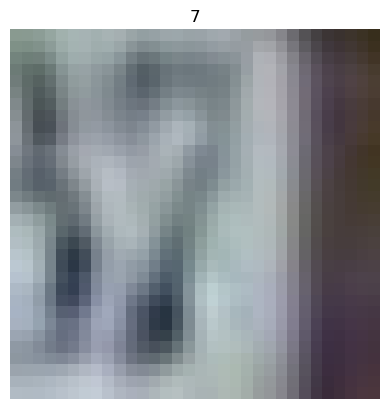

In [9]:
# Probamos la función
display_image(X_train[0],y_train[0])

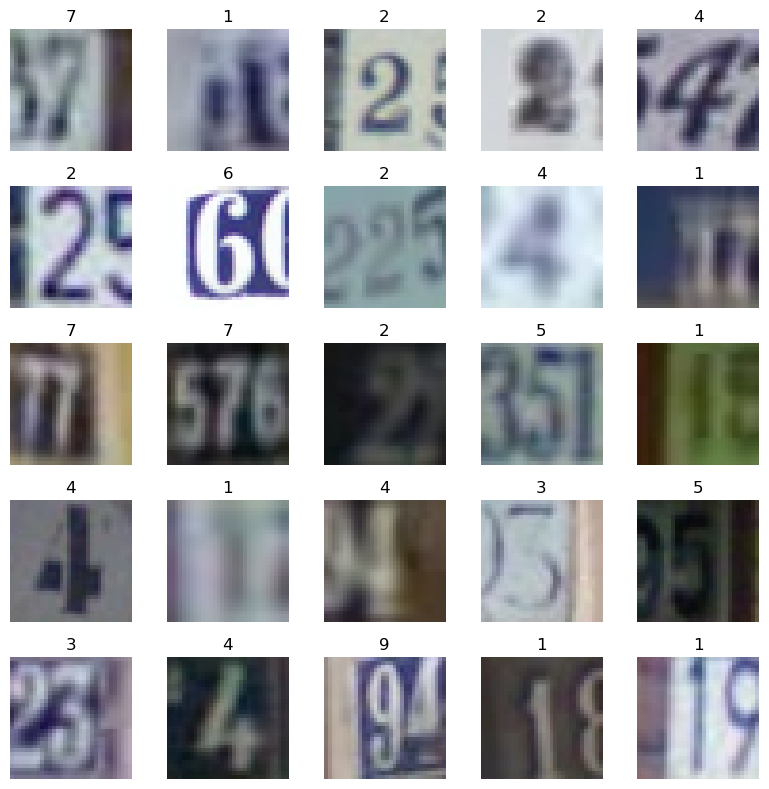

In [10]:
display_many(X_train[:25],y_train[:25],5,5)

In [11]:
# Sacar los valores únicos de y
valores_unicos, conteo = np.unique(y_train, return_counts=True)
# Convertir a DataFrame
df = pd.DataFrame({
    'Valor': valores_unicos,
    'Conteo': conteo
})
# Visualizar mejor
print(df)

   Valor  Conteo
0      1   11015
1      2    8452
2      3    6807
3      4    6018
4      5    5505
5      6    4574
6      7    4472
7      8    4031
8      9    3742
9     10    3989


In [12]:
# Hay gran cantidad de 1s y 2es y el 0 está mal nombrado como 10, vamos a correjir eso
y_train = np.where(y_train == 10, 0, y_train)
y_val = np.where(y_val == 10, 0, y_val)
y_test = np.where(y_test == 10, 0, y_test)

valores_unicos, conteo = np.unique(y_train, return_counts=True)
df = pd.DataFrame({
    'Valor': valores_unicos,
    'Conteo': conteo
})
print(df)

   Valor  Conteo
0      0    3989
1      1   11015
2      2    8452
3      3    6807
4      4    6018
5      5    5505
6      6    4574
7      7    4472
8      8    4031
9      9    3742


In [13]:
# Normalizamos los datos
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

print(X_train[0])

[[[0.5372549  0.60392157 0.56470588]
  [0.5372549  0.60392157 0.56862745]
  [0.54901961 0.61568627 0.58823529]
  ...
  [0.23921569 0.20392157 0.17254902]
  [0.23137255 0.19607843 0.14117647]
  [0.21568627 0.18039216 0.10980392]]

 [[0.49803922 0.56862745 0.52941176]
  [0.49019608 0.56078431 0.5254902 ]
  [0.50588235 0.57254902 0.54509804]
  ...
  [0.25490196 0.21568627 0.2       ]
  [0.24705882 0.20392157 0.16470588]
  [0.23137255 0.18823529 0.12156863]]

 [[0.45098039 0.51764706 0.49019608]
  [0.43137255 0.49803922 0.47058824]
  [0.43921569 0.49803922 0.47843137]
  ...
  [0.2745098  0.23529412 0.23137255]
  [0.27058824 0.22352941 0.19215686]
  [0.25490196 0.20392157 0.14901961]]

 ...

 [[0.60784314 0.64313725 0.67843137]
  [0.60784314 0.64705882 0.68235294]
  [0.60784314 0.64705882 0.68627451]
  ...
  [0.2627451  0.19607843 0.25882353]
  [0.2745098  0.20392157 0.25098039]
  [0.27843137 0.2        0.23921569]]

 [[0.65882353 0.69803922 0.73333333]
  [0.65882353 0.69803922 0.73333333]


Epoch 1/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.5237 - loss: 1.3970 - val_accuracy: 0.8574 - val_loss: 0.4751
Epoch 2/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8646 - loss: 0.4651 - val_accuracy: 0.8782 - val_loss: 0.4158
Epoch 3/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8871 - loss: 0.3857 - val_accuracy: 0.8795 - val_loss: 0.4074
Epoch 4/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9005 - loss: 0.3406 - val_accuracy: 0.8892 - val_loss: 0.3778
Epoch 5/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9102 - loss: 0.3062 - val_accuracy: 0.8907 - val_loss: 0.3826
Epoch 6/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9174 - loss: 0.2792 - val_accuracy: 0.8974 - val_loss: 0.3617
Epoch 7/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9244 - loss: 0.2546 - val_accuracy: 0.8969 - val_loss: 0.3642
Epoch 8/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 

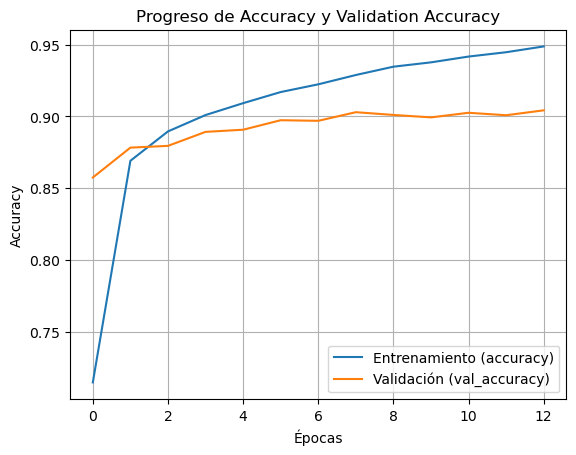

In [14]:
# Construir el modelo, una red densa da un acc de 0.18, GPT recomienda usar convolucionales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definimos la ruta de los checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "Checkpoints/4_3_3.weights.h5", save_weights_only=True)

# Definimos que el modelo pare si en 10 iteraciones no mejora
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
X_train,
y_train,
epochs=100,
validation_data=(X_val, y_val),
callbacks=[checkpoint_cb, early_stopping_cb],
)

# Graficar el progreso de la red neuronal

# Obtener los valores de accuracy y val_accuracy desde el history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Graficar el progreso de accuracy y val_accuracy
plt.plot(acc, label='Entrenamiento (accuracy)')
plt.plot(val_acc, label='Validación (val_accuracy)')
plt.title('Progreso de Accuracy y Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [16]:
# El modelo parece ligeramente sobreajustado, vamos a evaluarlo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de test: {test_acc}")

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9317 - loss: 0.2388
Precisión en el conjunto de test: 0.9312283992767334


30763


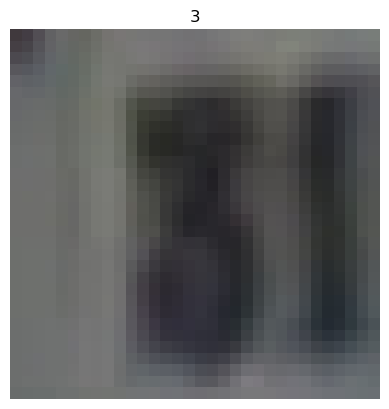

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicción de la clase: [3]


In [54]:
n = np.random.randint(0,len(X_test))
print(n)
display_image(X_test[n],y_test[n])
# Hacer la predicción
prediccion = model.predict(np.expand_dims(X_test[n], axis=0)) # Necesitamos un array (1,32,32,3), añadimos dimensión

# Si es una clasificación, probablemente querrás ver la clase con la mayor probabilidad
prediccion_clase = np.argmax(prediccion, axis=1)

print("Predicción de la clase:", prediccion_clase)

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [42]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

In [43]:
data.describe() # Tenemos 8 caracteristicas de X y 2 de Y

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [44]:
data.info() # No hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [45]:
data.head() # Vamos a necesitar normalizar los valores

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


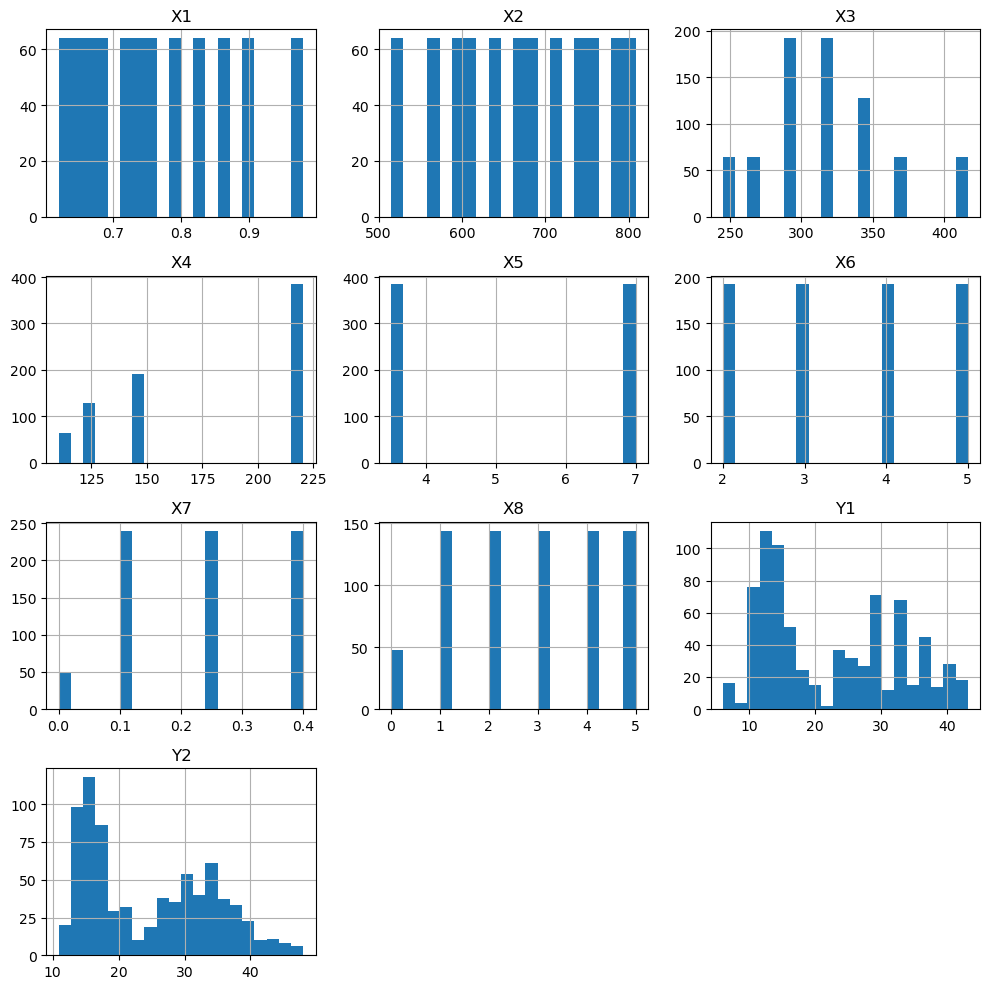

In [46]:
# Histograma para cada característica
data.hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show() # Ambas Y son variables numéricas mientras que todas las características de X son variables categoricas

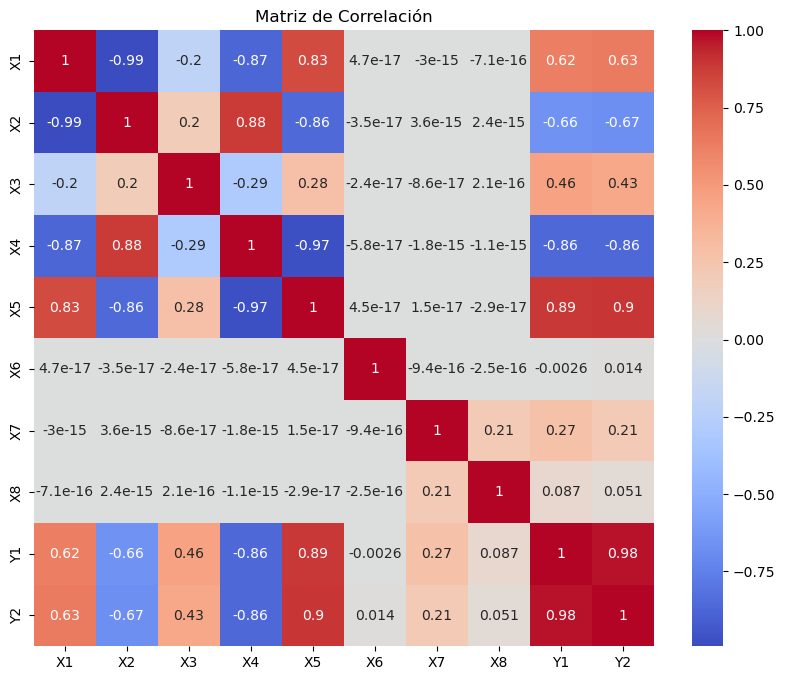

In [47]:
import seaborn as sns

# Matriz de correlación
correlation_matrix = data.corr()

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show() # X6 y X8 tienen poca correlacion con las etiquetas, se podía probar a ver si el modelo rinde mejor sin ellos

In [48]:
# Dividimos caracteristicas y etiquetas
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
y = data[["Y1", "Y2"]]
print(X.head())
print(y.head())

     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0
      Y1     Y2
0  15.55  21.33
1  15.55  21.33
2  15.55  21.33
3  15.55  21.33
4  20.84  28.28


In [49]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [50]:
# Crear una capa de normalización
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

# Construir el modelo de red neuronal
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Salida con dos neuronas para Y1 y Y2
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])

Epoch 1/100
17/17 [==============================] - 1s 21ms/step - loss: 15.4226 - mae: 15.4226 - val_loss: 7.4313 - val_mae: 7.4313
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 4.7873 - mae: 4.7873 - val_loss: 4.0917 - val_mae: 4.0917
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 3.4094 - mae: 3.4094 - val_loss: 3.3384 - val_mae: 3.3384
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 2.8664 - mae: 2.8664 - val_loss: 2.8560 - val_mae: 2.8560
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 2.5807 - mae: 2.5807 - val_loss: 2.5015 - val_mae: 2.5015
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 2.3646 - mae: 2.3646 - val_loss: 2.5157 - val_mae: 2.5157
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 2.2530 - mae: 2.2530 - val_loss: 2.4866 - val_mae: 2.4866
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 2.2154 

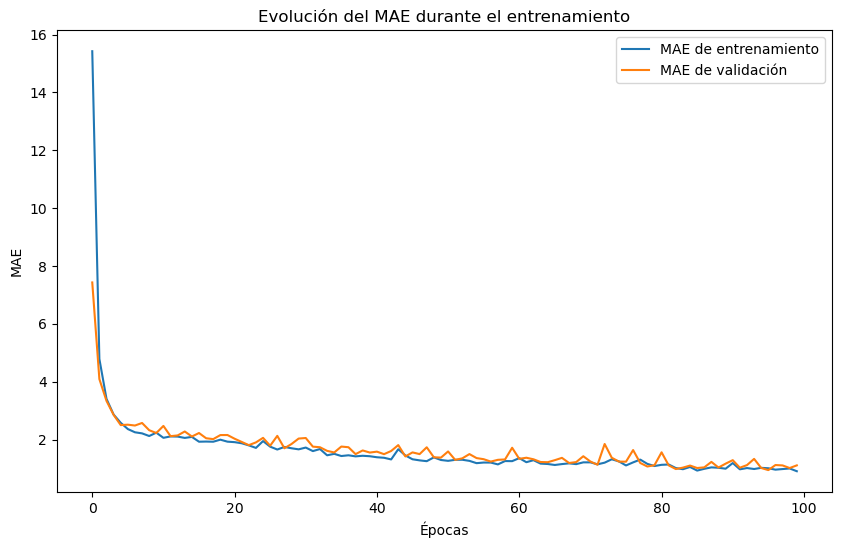

Error Absoluto Medio en el conjunto de prueba: 1.09


In [51]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Graficar la evolución del error absoluto medio
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del MAE durante el entrenamiento')
plt.show() # No se aprecia sobreajuste

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Error Absoluto Medio en el conjunto de prueba: {mae:.2f}") # El MAE es significativamente menor a la STD de 10 que tienen las etiquetas

In [52]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Mostrar algunas predicciones junto con sus valores reales
for i in range(10):
    print(f"Predicción: {predictions[i]}, Real: {y_test.iloc[i].values}")
    print(f"Diferencia entre etiquetas reales y predecidas: {predictions[i] - y_test.iloc[i].values}") # La etiqueta de Y2 en ocasiones falla drásticamente

# Calcular el promedio de la diferencia entre predicciones y valores reales
differences = np.abs(predictions - y_test.values)  # Diferencias absolutas
average_difference = np.mean(differences, axis=0)  # Promedio por columna
print(f"Promedio de la diferencia absoluta (Y1, Y2): {average_difference}")
# Añadimos para evaluación final
all_difference = {}
all_difference["With X6,X8, LR=0.1"] = average_difference

4/4 [==============================] - 0s 2ms/step
Predicción: [28.639217 30.300291], Real: [24.94 29.88]
Diferencia entre etiquetas reales y predecidas: [3.69921738 0.42029106]
Predicción: [35.580826 36.26847 ], Real: [35.45 41.86]
Diferencia entre etiquetas reales y predecidas: [ 0.13082581 -5.59152924]
Predicción: [29.862988 32.504387], Real: [28.07 34.14]
Diferencia entre etiquetas reales y predecidas: [ 1.79298752 -1.6356131 ]
Predicción: [ 8.1739855 12.210589 ], Real: [ 8.6  12.07]
Diferencia entre etiquetas reales y predecidas: [-0.42601452  0.14058941]
Predicción: [36.29805  38.044567], Real: [36.95 36.87]
Diferencia entre etiquetas reales y predecidas: [-0.65195007  1.17456711]
Predicción: [15.033939 17.509098], Real: [14.58 17.47]
Diferencia entre etiquetas reales y predecidas: [0.45393936 0.03909805]
Predicción: [36.031044 36.434856], Real: [35.89 43.3 ]
Diferencia entre etiquetas reales y predecidas: [ 0.14104401 -6.86514359]
Predicción: [25.754906 27.058893], Real: [24.4  

Probando con learning_rate:0.003
Epoch 1/100
17/17 [==============================] - 1s 20ms/step - loss: 21.6000 - mae: 21.6000 - val_loss: 20.9130 - val_mae: 20.9130
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 14.3143 - mae: 14.3143 - val_loss: 8.8766 - val_mae: 8.8766
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 5.8013 - mae: 5.8013 - val_loss: 5.3463 - val_mae: 5.3463
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 4.2415 - mae: 4.2415 - val_loss: 4.2977 - val_mae: 4.2977
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 3.4978 - mae: 3.4978 - val_loss: 3.8443 - val_mae: 3.8443
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 3.0606 - mae: 3.0606 - val_loss: 3.3321 - val_mae: 3.3321
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 2.7359 - mae: 2.7359 - val_loss: 3.0019 - val_mae: 3.0019
Epoch 8/100
17/17 [========================

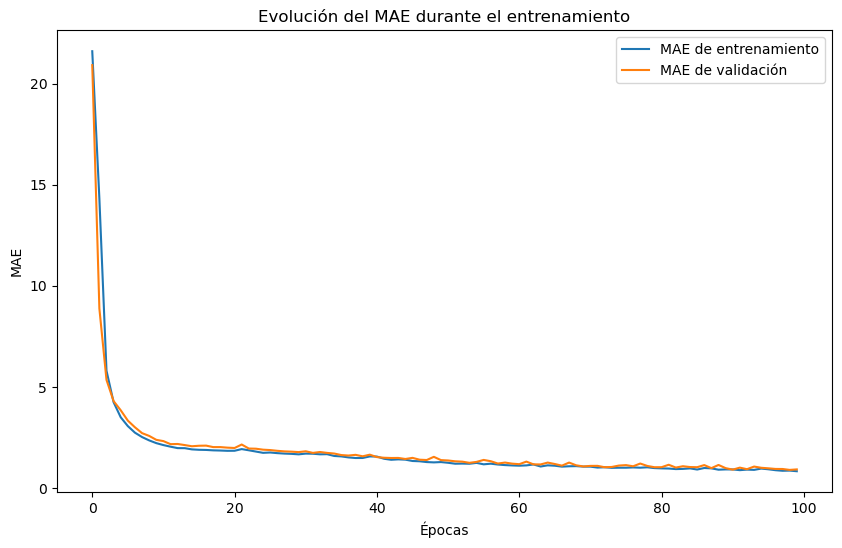

Error Absoluto Medio en el conjunto de prueba: 0.83
4/4 [==============================] - 0s 2ms/step
Predicción: [29.13936  29.519066], Real: [24.94 29.88]
Diferencia entre etiquetas reales y predecidas: [ 4.19936043 -0.36093414]
Predicción: [35.543724 36.76587 ], Real: [35.45 41.86]
Diferencia entre etiquetas reales y predecidas: [ 0.09372406 -5.09413086]
Predicción: [28.012186 29.790594], Real: [28.07 34.14]
Diferencia entre etiquetas reales y predecidas: [-0.05781395 -4.3494059 ]
Predicción: [ 8.569933 12.613194], Real: [ 8.6  12.07]
Diferencia entre etiquetas reales y predecidas: [-0.03006706  0.54319447]
Predicción: [36.345596 37.29726 ], Real: [36.95 36.87]
Diferencia entre etiquetas reales y predecidas: [-0.60440369  0.42726028]
Promedio de la diferencia absoluta (Y1, Y2): [0.51865655 1.14816025]
Probando con learning_rate:0.001
Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 0.8048 - mae: 0.8048 - val_loss: 0.8690 - val_mae: 0.8690
Epoch 2/100
17/17 

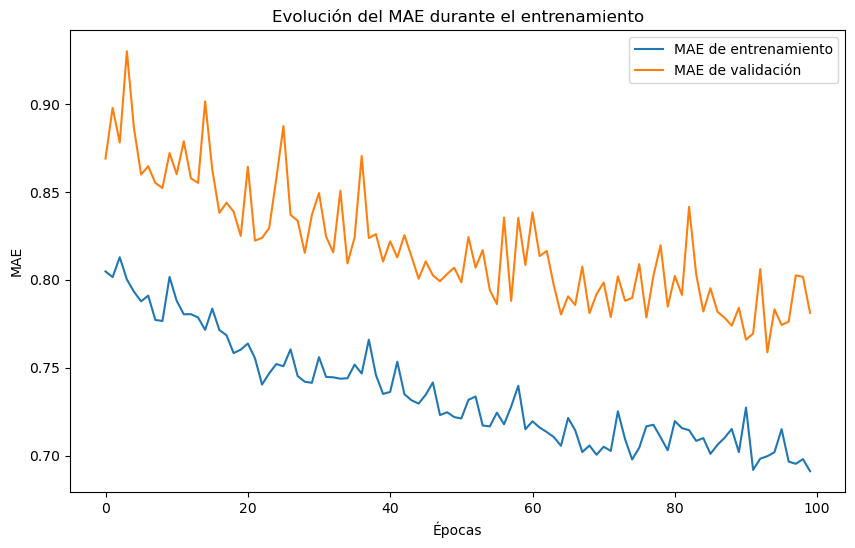

Error Absoluto Medio en el conjunto de prueba: 0.74
4/4 [==============================] - 0s 2ms/step
Predicción: [27.055302 28.14597 ], Real: [24.94 29.88]
Diferencia entre etiquetas reales y predecidas: [ 2.11530167 -1.73403061]
Predicción: [36.107063 37.567204], Real: [35.45 41.86]
Diferencia entre etiquetas reales y predecidas: [ 0.65706329 -4.29279648]
Predicción: [28.541925 30.363342], Real: [28.07 34.14]
Diferencia entre etiquetas reales y predecidas: [ 0.47192543 -3.77665771]
Predicción: [ 8.224486 12.022512], Real: [ 8.6  12.07]
Diferencia entre etiquetas reales y predecidas: [-0.37551365 -0.04748756]
Predicción: [36.477806 37.308002], Real: [36.95 36.87]
Diferencia entre etiquetas reales y predecidas: [-0.47219391  0.43800247]
Promedio de la diferencia absoluta (Y1, Y2): [0.40875519 1.06966508]
Probando con learning_rate:0.01
Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 2.2797 - mae: 2.2797 - val_loss: 2.2272 - val_mae: 2.2272
Epoch 2/100
17/17 [

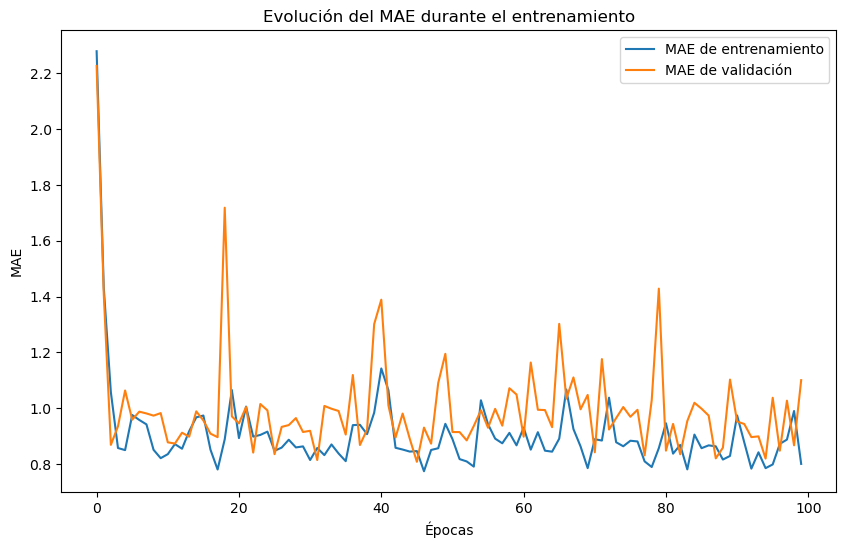

Error Absoluto Medio en el conjunto de prueba: 1.02
4/4 [==============================] - 0s 2ms/step
Predicción: [26.954704 28.343836], Real: [24.94 29.88]
Diferencia entre etiquetas reales y predecidas: [ 2.01470428 -1.53616417]
Predicción: [36.89104  38.196434], Real: [35.45 41.86]
Diferencia entre etiquetas reales y predecidas: [ 1.4410408  -3.66356598]
Predicción: [29.837439 31.888107], Real: [28.07 34.14]
Diferencia entre etiquetas reales y predecidas: [ 1.76743858 -2.2518927 ]
Predicción: [ 8.65933  12.527201], Real: [ 8.6  12.07]
Diferencia entre etiquetas reales y predecidas: [0.05933037 0.4572007 ]
Predicción: [37.47204 37.69194], Real: [36.95 36.87]
Diferencia entre etiquetas reales y predecidas: [0.52203827 0.82194031]
Promedio de la diferencia absoluta (Y1, Y2): [0.77864233 1.26532685]
Probando con learning_rate:0.1
Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 10.7893 - mae: 10.7893 - val_loss: 4.6931 - val_mae: 4.6931
Epoch 2/100
17/17 [=====

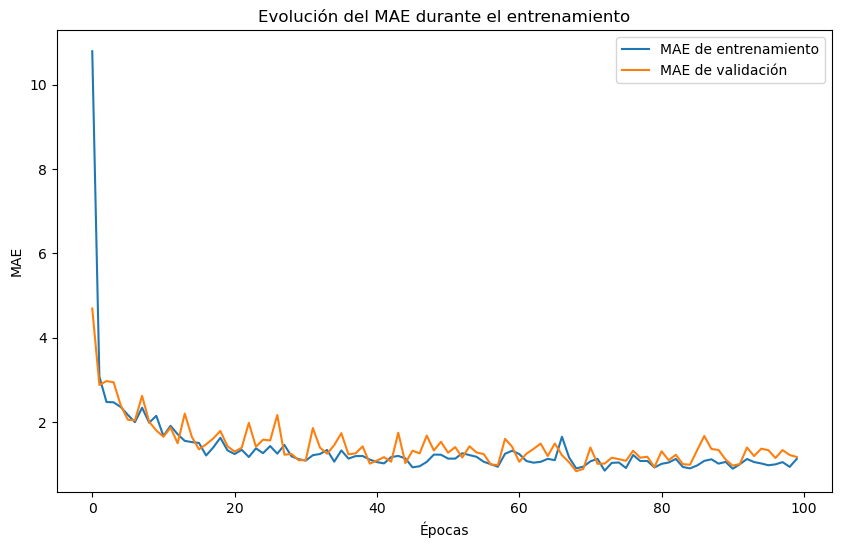

Error Absoluto Medio en el conjunto de prueba: 0.94
4/4 [==============================] - 0s 2ms/step
Predicción: [25.913754 28.23717 ], Real: [24.94 29.88]
Diferencia entre etiquetas reales y predecidas: [ 0.97375351 -1.64283073]
Predicción: [36.316273 38.610325], Real: [35.45 41.86]
Diferencia entre etiquetas reales y predecidas: [ 0.86627274 -3.24967514]
Predicción: [27.573397 31.051943], Real: [28.07 34.14]
Diferencia entre etiquetas reales y predecidas: [-0.49660332 -3.08805717]
Predicción: [ 7.1983843 11.54332  ], Real: [ 8.6  12.07]
Diferencia entre etiquetas reales y predecidas: [-1.40161572 -0.5266803 ]
Predicción: [34.85346 34.97335], Real: [36.95 36.87]
Diferencia entre etiquetas reales y predecidas: [-2.0965416  -1.89664948]
Promedio de la diferencia absoluta (Y1, Y2): [0.6602434  1.21825586]


In [53]:
# Vamos a hacer cambios en el modelo

# Quitamos X6 y X8
X = data[["X1", "X2", "X3", "X4", "X5", "X7"]]
y = data[["Y1", "Y2"]]

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Hay que volver a haace el modelo por los cambios en X
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

# Construir el modelo de red neuronal
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Salida con dos neuronas para Y1 y Y2
])

# Quiero probar diferentes learning_rate
learning_rates = [0.003,0.001,0.01,0.1]

for learning_rate in learning_rates:
    print(f"Probando con learning_rate:{learning_rate}")

    # Compilar el modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mae', metrics=['mae'])

    # Entrenar el modelo
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=100,
        batch_size=32
    )

    # Graficar la evolución del error absoluto medio
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='MAE de entrenamiento')
    plt.plot(history.history['val_mae'], label='MAE de validación')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('Evolución del MAE durante el entrenamiento')
    plt.show()

    # Evaluar el modelo en el conjunto de prueba
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"Error Absoluto Medio en el conjunto de prueba: {mae:.2f}")

    # Realizar predicciones en el conjunto de prueba
    predictions = model.predict(X_test)

    # Mostrar algunas predicciones junto con sus valores reales
    for i in range(5):
        print(f"Predicción: {predictions[i]}, Real: {y_test.iloc[i].values}")
        print(f"Diferencia entre etiquetas reales y predecidas: {predictions[i] - y_test.iloc[i].values}")
        
    # Calcular el promedio de la diferencia entre predicciones y valores reales
    differences = np.abs(predictions - y_test.values)  # Diferencias absolutas
    average_difference = np.mean(differences, axis=0)  # Promedio por columna
    print(f"Promedio de la diferencia absoluta (Y1, Y2): {average_difference}")
    # Añadimos para evaluación final
    all_difference["No X6,X8, LR={}".format(learning_rate)] = average_difference


In [55]:
# Visualicemos los resultados en test de todos los modelos
for key, value in all_difference.items():
    print(f"{key}: {value}")

With X6,X8, LR=0.1: [0.89937934 1.27495705]
No X6,X8, LR=0.003: [0.51865655 1.14816025]
No X6,X8, LR=0.001: [0.40875519 1.06966508]
No X6,X8, LR=0.01: [0.77864233 1.26532685]
No X6,X8, LR=0.1: [0.6602434  1.21825586]


In [ ]:
# Parece que eliminar X6 y X8 ha ayudado, pero ajustar el LR a 0.001 ha mejorado aún más el error promedio